In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from utils import *
from skimage.metrics import structural_similarity as ssim

from VNG import reconstruct_image as vng_reconstruction

sns.set(font_scale=1.3, palette='Set1')

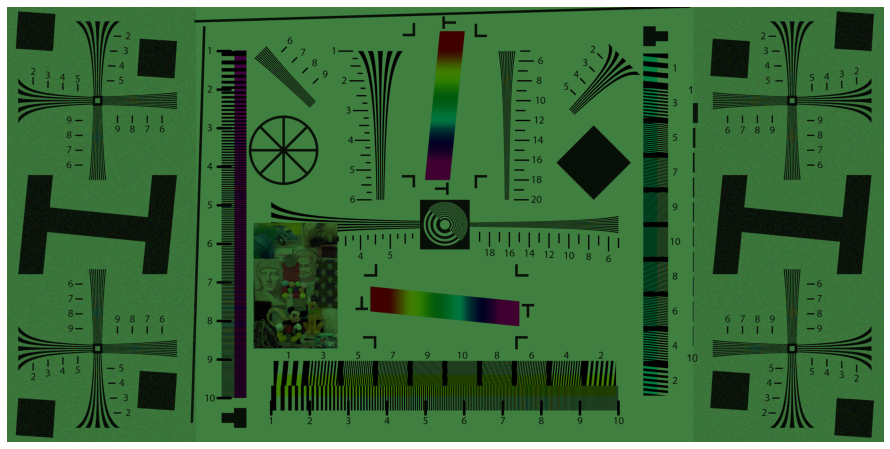

In [2]:
image = plt.imread('RGB_CFA.bmp')

plt.figure(figsize=(16, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

Расположение пикселей в фильтре определены по верхнему левому квадрату 2x2

In [3]:
bayer_filter = np.array([['r', 'g'], ['g', 'b']])

padded_image = pad_image(image)
n, m, _ = padded_image.shape
transformed_image = [[get_color(padded_image[i, j], bayer_filter[i % 2][j % 2]) for j in range(m)] for i in range(n)]
transformed_image = np.array(transformed_image).astype(int)

In [4]:
start = time.time()
reconstructed_image = vng_reconstruction(transformed_image, bayer_filter, image.shape)
end = time.time()

  0%|          | 0/2073 [00:00<?, ?it/s]

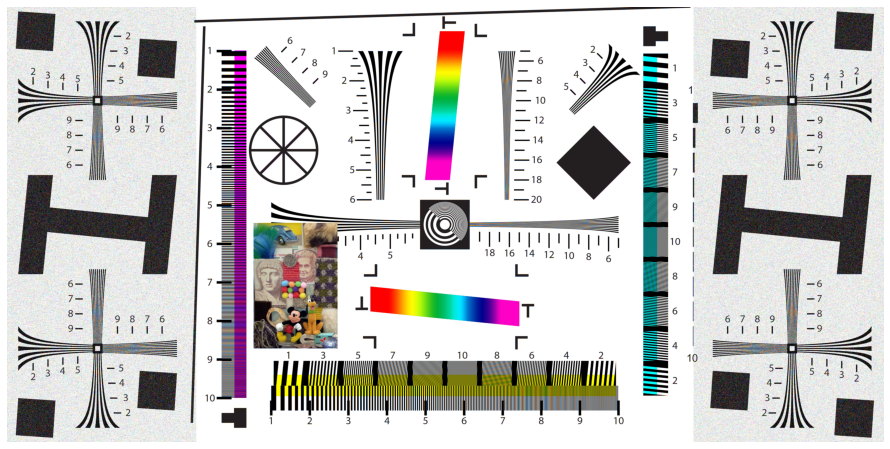

In [6]:
plt.figure(figsize=(16, 8))
plt.imshow(reconstructed_image)
plt.axis('off')
plt.show()

In [7]:
original = plt.imread('Original.bmp')
pixel_numbers = np.prod(original.shape) / 3

print('RSNR: {}'.format(10 * np.log10(255 ** 2 / ((original - reconstructed_image) ** 2).mean()).round(3)))
print('SSIM: {}'.format(ssim(original, reconstructed_image.astype(int), multichannel=True).round(2)))
print('Время работы: {} сек/мегапиксель'.format(((end - start) / (pixel_numbers / 10 ** 6)).round(2)))

RSNR: 33.55
SSIM: 0.83
Время работы: 128.75 сек/мегапиксель


In [8]:
from PIL import Image
im = Image.fromarray(reconstructed_image.astype(np.uint8))
im.save('Reconstructed_VNG.bmp')